In [1]:
library('tidyverse')
library('readxl')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
goi_lst <-
    c(
        'CD4', 'CD84', 'CD68', 'CMKLR1', 'CSF1', 'CSF1R', 'CD3E', 'NCAM1',
        'CSF2RB', 'CTSS', 'IL2RB', 'KLRK1', 'LGALS9', 'LILRA3',
        'LTB', 'SIGLEC1', 'TGFBR2', 'TNF', 'VCAM1',
        'COL2A1', 'COL11A2', 'MIA', 'COL1A2', 'APP',
        'ACTB', 'ARBP', 'GAPDH', 'HPRT', 'SDHA', 'UBC', 'YWHAZ'
    )


In [3]:
chandro_sarcoma <-
    read_xlsx('Chondrosarcoma Nanostring 12082023.xlsx', sheet='Chondrosarcoma Raw data ') %>%
    drop_na(`Probe Name`) %>%
    select(-`Standard_12.RCC`, -c(`NS Probe ID`:`Class Date`), -c(`Annotation`, `Accession #`, `Avg Count`, `Min Count`, `Max Count`, `%CV`)) %>%
    rename(`gene`=`Probe Name`) %>%
    mutate(
        across(`NMS22-13453_08.RCC`:`S18-6943_07.RCC`, parse_double),
        `Subtype`='Chondro'
    ) %>%
    pivot_longer(
        names_to='Case ID',
        values_to='expression',
        -c(`gene`, `Subtype`)
    )

chandro_sarcoma %>%
    head()

gene,Subtype,Case ID,expression
<chr>,<chr>,<chr>,<dbl>
A2M,Chondro,NMS22-13453_08.RCC,12739
A2M,Chondro,NMS22-28934_09.RCC,17526
A2M,Chondro,NMS23-1947_11.RCC,8575
A2M,Chondro,NMS23-471_10.RCC,6694
A2M,Chondro,S08-25548_01.RCC,7450
A2M,Chondro,S10-479_02.RCC,1517


In [4]:
chandro_sarcoma %>%
    filter(`gene` %in% c('LTBR', 'CD18', 'TNFR3', 'TNFRSF3'))

gene,Subtype,Case ID,expression
<chr>,<chr>,<chr>,<dbl>


In [5]:
exp_tbl <-
    read_xlsx('2017 Nanostring Sarcoma 3.xlsx', sheet='For Kelsey') %>%
    rename(
        `Subtype`=`...1`,
        `Case ID`=`Gene Id...2`,
    ) %>%
    filter(!is.na(`Subtype`)) %>%
    select(`Subtype`:`ZKSCAN5`) %>%
    pivot_longer(
        names_to='gene',
        values_to='expression',
        -c(`Subtype`, `Case ID`)
    ) %>%
    mutate(`expression`=parse_double(`expression`)) %>%
    bind_rows(chandro_sarcoma)

exp_tbl

New names:
• `` -> `...1`
• `Gene Id` -> `Gene Id...2`
• `Gene Id` -> `Gene Id...763`
• `` -> `...764`
• `` -> `...765`
• `` -> `...766`
• `` -> `...767`
• `` -> `...768`
• `` -> `...769`
• `` -> `...770`
• `` -> `...771`
• `` -> `...772`
• `` -> `...773`
• `` -> `...774`
• `` -> `...775`
• `` -> `...776`
• `` -> `...777`
• `` -> `...778`
• `` -> `...779`
• `` -> `...780`
• `` -> `...781`
• `` -> `...782`
• `` -> `...783`
• `` -> `...784`
• `` -> `...785`
• `` -> `...786`
• `` -> `...787`
• `` -> `...788`
• `` -> `...789`
• `` -> `...790`
• `` -> `...791`


Subtype,Case ID,gene,expression
<chr>,<chr>,<chr>,<dbl>
UPS,RU-14-00052 A1,AAMP,71.000
UPS,RU-14-00052 A1,ABCB1,17.000
UPS,RU-14-00052 A1,ADAM11,13.000
UPS,RU-14-00052 A1,ADIPOQ,23.000
UPS,RU-14-00052 A1,ADORA2A,7.000
UPS,RU-14-00052 A1,ADORA2b,33.000
UPS,RU-14-00052 A1,AGGF1,44.000
UPS,RU-14-00052 A1,ALB,1.000
UPS,RU-14-00052 A1,AMICA1,100.000


In [6]:
exp_tbl %>%
    distinct(`Subtype`, `Case ID`) %>%
    count(`Subtype`, sort=TRUE)

Subtype,n
<chr>,<int>
LMS,18
UPS,18
SS,15
MRCL,12
WD DD,12
Chondro,11


In [7]:
exp_tbl %>%
    filter(`gene` == 'LTBR') %>%
    count(`Subtype`)

Subtype,n
<chr>,<int>
LMS,18
MRCL,12
SS,15
UPS,18
WD DD,12


In [8]:
exp_tbl %>%
    write_csv('Sarcoma-combined_expression_tbl.csv')

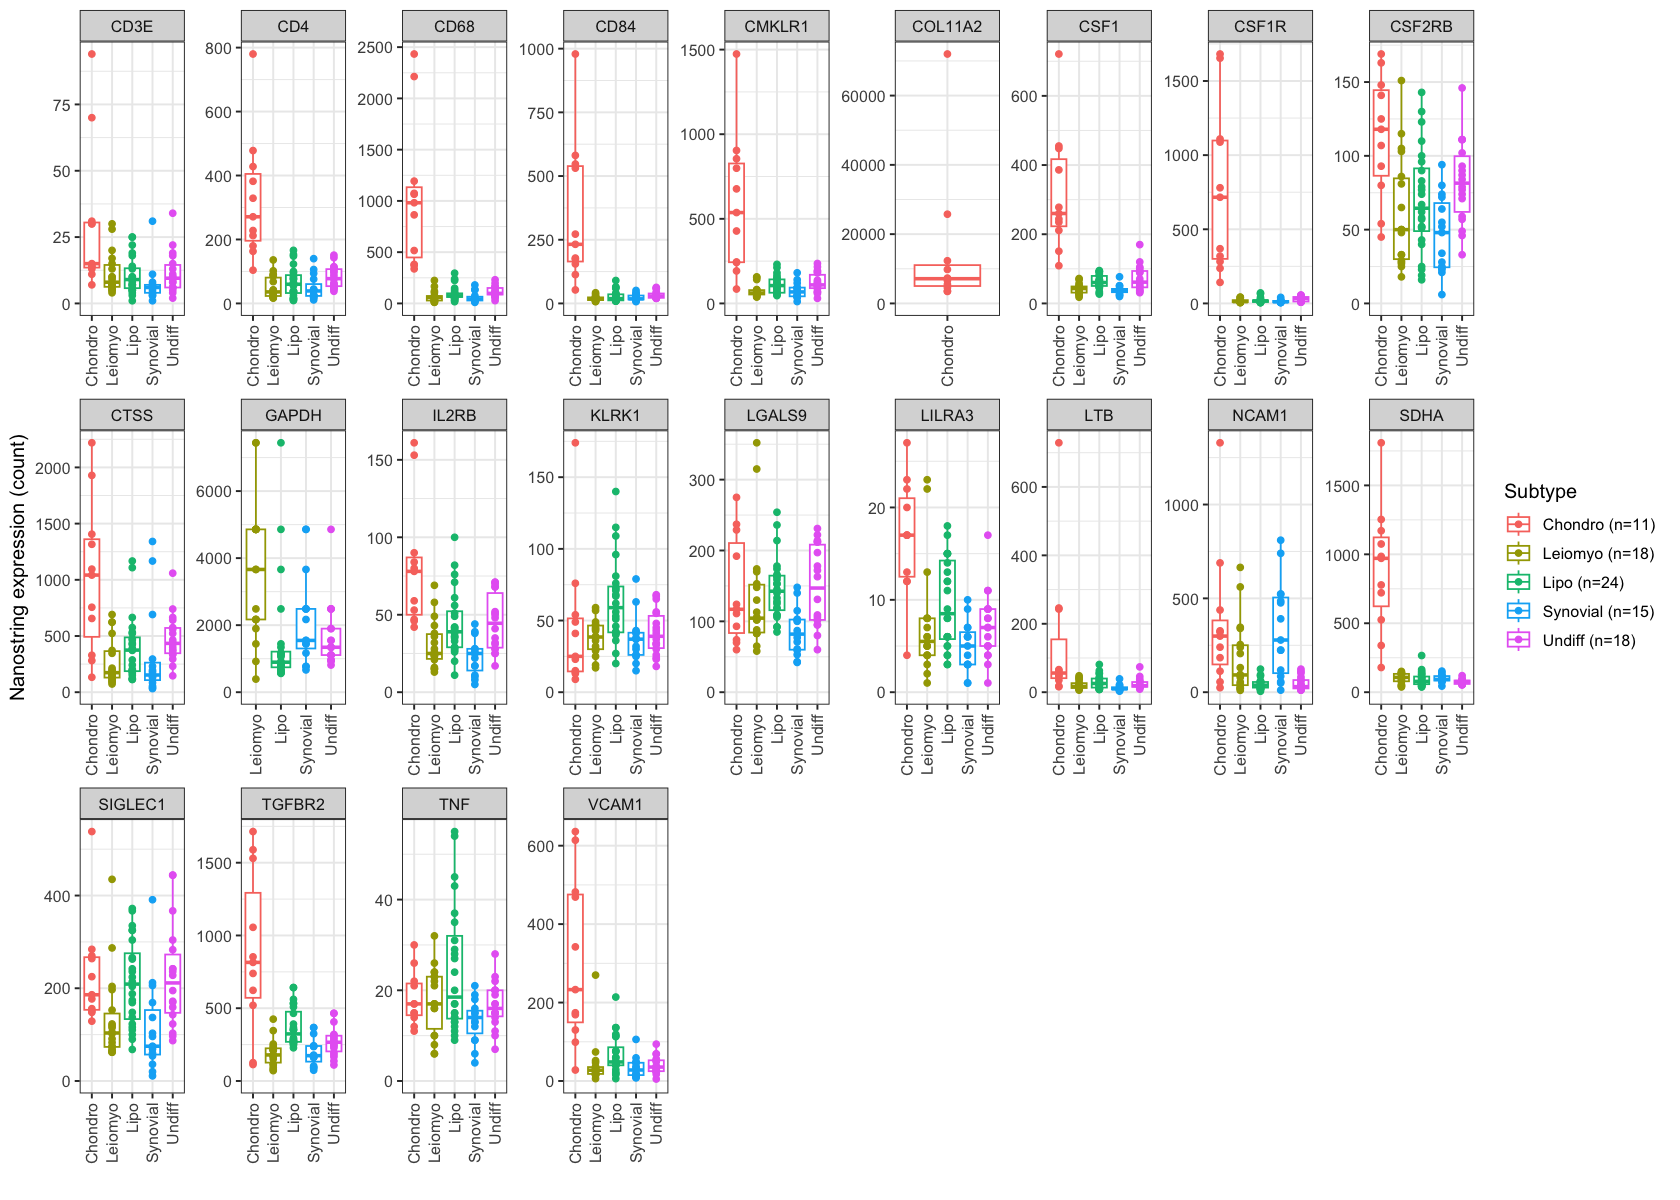

In [9]:
options(repr.plot.width=14, repr.plot.height=10)

across_cancers_plt <-
    exp_tbl %>%
    filter(`gene` %in% goi_lst) %>%
    mutate(
        `subtype_label`=case_when(
            `Subtype` == 'LMS' ~ 'Leiomyo',
            `Subtype` == 'SS' ~ 'Synovial',
            `Subtype` == 'UPS' ~ 'Undiff',
            `Subtype` == 'MRCL' ~ 'Lipo',
            `Subtype` == 'WD DD' ~ 'Lipo',
            `Subtype` == 'Chondro' ~ 'Chondro',
        ) %>% factor(levels=c('Chondro', 'Leiomyo', 'Lipo', 'Synovial', 'Undiff'))
    ) %>%
    add_count(`subtype_label`, `gene`) %>%
    mutate(`subtype_legend`=paste(`subtype_label`, ' (n=', `n`, ')', sep='')) %>%
    ggplot(aes(x=`subtype_label`, y=`expression`, color=`subtype_legend`)) +
#        stat_summary(geom='col', fun=mean, fill='white') +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_wrap(~`gene`, scales='free', ncol=9) +
        ylim(0, NA) +
        theme_bw(base_size=12) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
        labs(color='Subtype', x='', y='Nanostring expression (count)')

across_cancers_plt

options(org_opts)

In [10]:
ggsave(across_cancers_plt, filename='Sarcoma-expression_across_subtypes.svg', width=14, height=10)

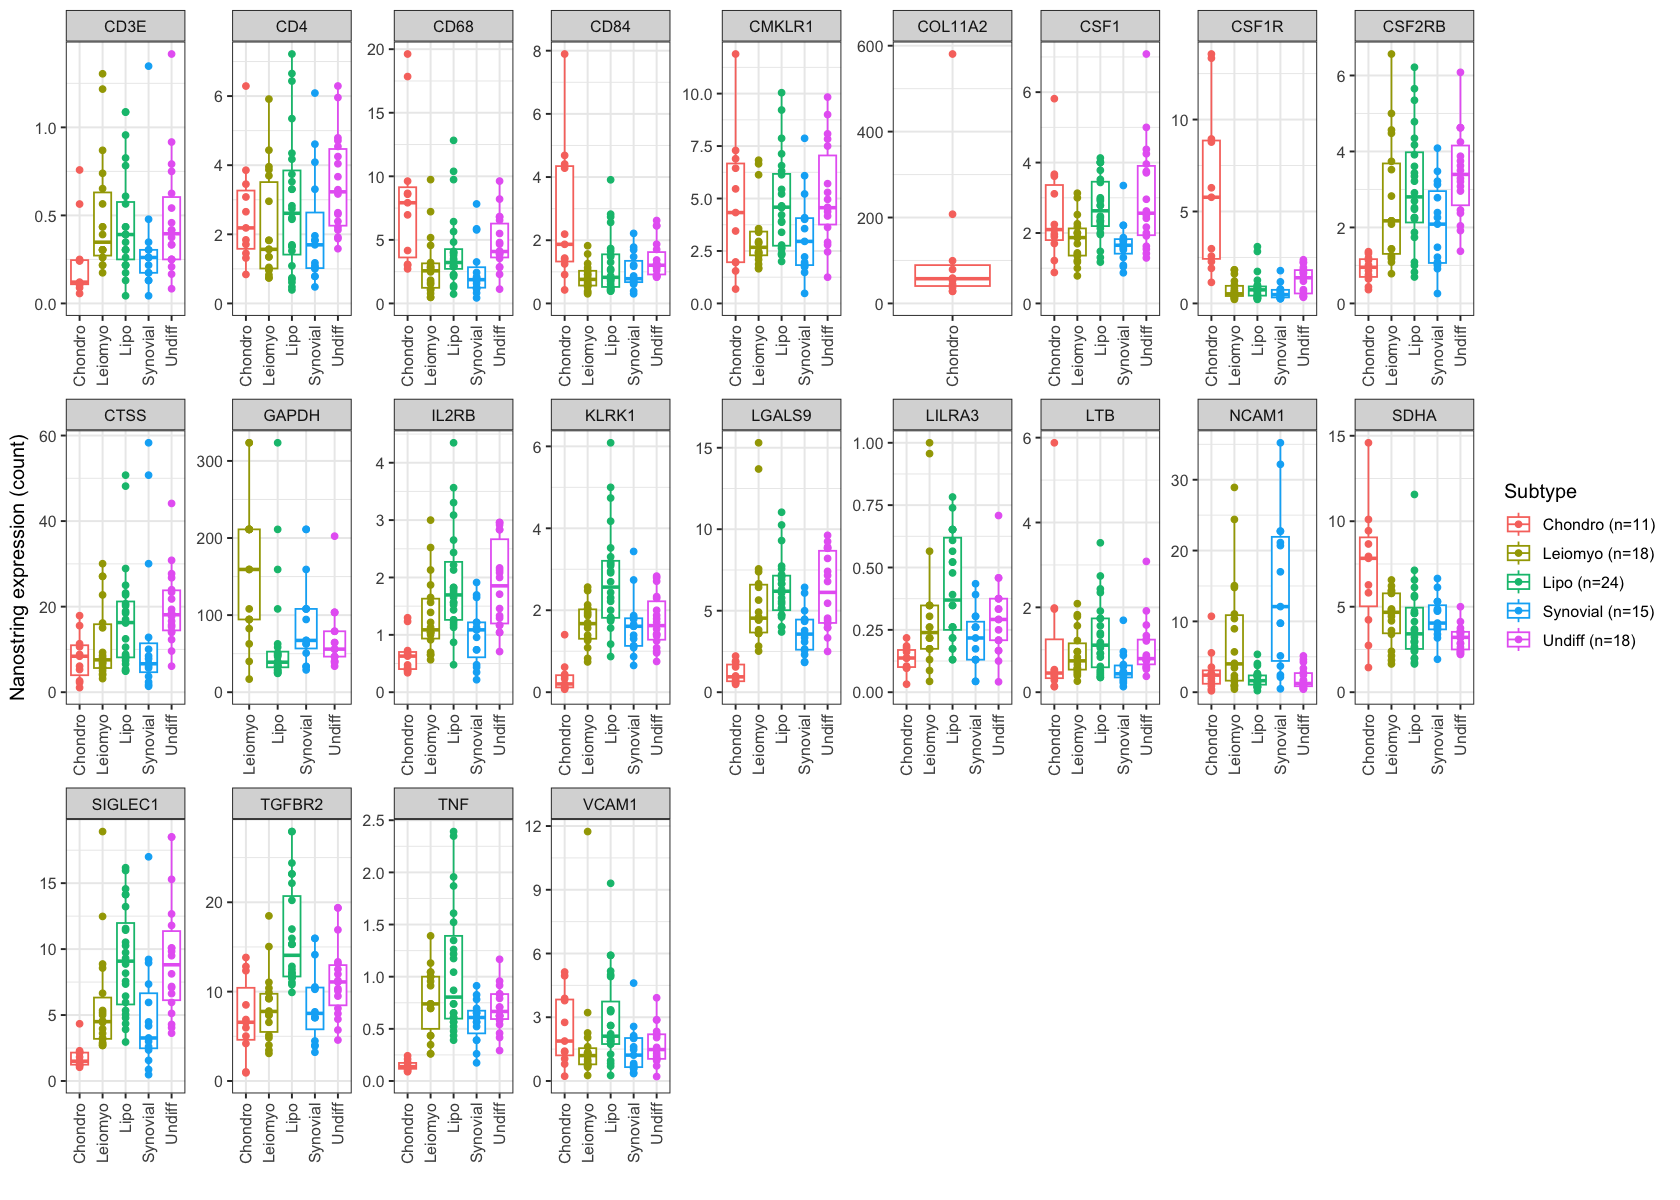

In [11]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    group_by(`Subtype`) %>%
    mutate(
        `median_exp`=median(`expression`),
        `med_norm_exp`=`expression`/`median_exp`
    ) %>%
    ungroup() %>%
    filter(`gene` %in% goi_lst) %>%
    mutate(
        `subtype_label`=case_when(
            `Subtype` == 'LMS' ~ 'Leiomyo',
            `Subtype` == 'SS' ~ 'Synovial',
            `Subtype` == 'UPS' ~ 'Undiff',
            `Subtype` == 'MRCL' ~ 'Lipo',
            `Subtype` == 'WD DD' ~ 'Lipo',
            `Subtype` == 'Chondro' ~ 'Chondro',
        ) %>% factor(levels=c('Chondro', 'Leiomyo', 'Lipo', 'Synovial', 'Undiff'))
    ) %>%
    add_count(`subtype_label`, `gene`) %>%
    mutate(`subtype_legend`=paste(`subtype_label`, ' (n=', `n`, ')', sep='')) %>%
    ggplot(aes(x=`subtype_label`, y=`med_norm_exp`, color=`subtype_legend`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_wrap(~`gene`, scales='free', ncol=9) +
        ylim(0, NA) +
        theme_bw(base_size=12) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
        labs(color='Subtype', x='', y='Nanostring expression (count)')

options(org_opts)